<a href="https://colab.research.google.com/github/kenhuangsy/Implementing-CNN-Architectures/blob/main/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist

In [2]:
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2,
                                                  random_state = 42)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(48000, 28, 28)
(10000, 28, 28)
(12000, 28, 28)
(48000,)
(10000,)
(12000,)


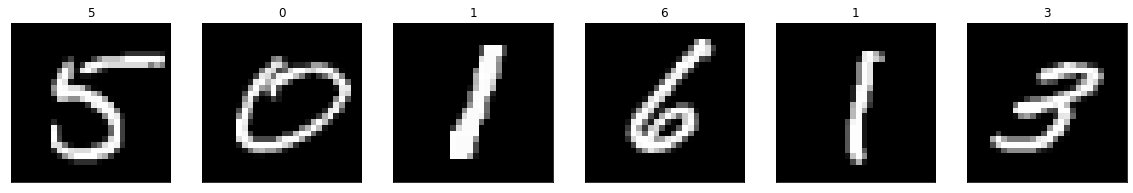

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
for i in range(6):
  ax = fig.add_subplot(1, 6, i+1, xticks = [], yticks = [])
  ax.imshow(X_train[i], cmap = 'gray')
  ax.set_title(str(y_train[i]))

In [5]:
# Normalize the data
import numpy as np
mean = np.mean(X_train)
std = np.std(X_train)

X_train = (X_train - mean)/(std+1e-7)
X_test = (X_test - mean)/(std+1e-7)
X_val = (X_val - mean)/(std+1e-7)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_val.shape[0], 'validation samples')

48000 train samples
10000 test samples
12000 validation samples


In [6]:
# One hot encode the data
from keras.utils import np_utils

num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [7]:
y_val = np_utils.to_categorical(y_val, num_classes)

In [8]:
X_train.shape[0]

48000

In [9]:
# Reshape the data to fit our CNN

img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, AveragePooling2D, Conv2D

INPUT_SHAPE = (28, 28, 1)

lenet_model = Sequential([
    # C1 Convolutional Layer
    Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh', padding = 'same',
           input_shape = INPUT_SHAPE),
    
    # S2 Pooling Layer
    AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'),

    # C3 Convolutional layer
    Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'tanh',
           padding = 'valid'),
    
    # S4 Pooling Layer
    AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'),

    # C5 Convolutional Layer
    Conv2D(filters = 120, kernel_size = 5, strides = 1, activation = 'tanh',
           padding = 'valid'),

    # Flatten to feed into FC
    Flatten(),

    # FC6
    Dense(units = 84, activation = 'tanh'),

    # FC7
    Dense(10, activation = 'softmax')
])

In [11]:
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [12]:
# Learning rescheduler
def lr_schedule(epoch):
  """
  Args:
    epoch(int): number of epoch
  Return
    lr(int): learning rate
  """
  if epoch <= 2: # 0.0005 for the first two epochs
    lr = 5e-4
  elif epoch > 2 and epoch <= 5: # 0.0002 for the next 3 epochs
    lr = 2e-4
  elif epoch > 5 and epoch <= 9: # 0.00005 for the next 4
    lr = 5e-5
  else: # finally 0.00001
    lr = 1e-5 
  return lr

In [13]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

lr_scheduler = LearningRateScheduler(lr_schedule)
checkpoint = ModelCheckpoint(filepath = "lenet5.hdf5", monitor = 'val_acc',
                             verbose = 1,
                             save_best_only = True)

callbacks = [checkpoint, lr_scheduler]

lenet_model.compile(loss = 'categorical_crossentropy',
                    optimizer = 'SGD',
                    metrics = ['accuracy'])




In [14]:
lenet_hist = lenet_model.fit(X_train, y_train,
                             batch_size = 32,
                             epochs = 20,
                             validation_data = (X_val, y_val),
                             callbacks = callbacks,
                             verbose = 2, shuffle = True)

Epoch 1/20


1500/1500 - 16s - loss: 1.9430 - accuracy: 0.5044 - val_loss: 1.5153 - val_accuracy: 0.6819 - lr: 5.0000e-04 - 16s/epoch - 11ms/step
Epoch 2/20


1500/1500 - 5s - loss: 1.1866 - accuracy: 0.7407 - val_loss: 0.9558 - val_accuracy: 0.7876 - lr: 5.0000e-04 - 5s/epoch - 3ms/step
Epoch 3/20


1500/1500 - 5s - loss: 0.8237 - accuracy: 0.8137 - val_loss: 0.7282 - val_accuracy: 0.8314 - lr: 5.0000e-04 - 5s/epoch - 3ms/step
Epoch 4/20


1500/1500 - 5s - loss: 0.6973 - accuracy: 0.8381 - val_loss: 0.6736 - val_accuracy: 0.8417 - lr: 2.0000e-04 - 5s/epoch - 3ms/step
Epoch 5/20


1500/1500 - 5s - loss: 0.6493 - accuracy: 0.8480 - val_loss: 0.6303 - val_accuracy: 0.8501 - lr: 2.0000e-04 - 5s/epoch - 3ms/step
Epoch 6/20


1500/1500 - 5s - loss: 0.6107 - accuracy: 0.8544 - val_loss: 0.5948 - val_accuracy: 0.8565 - lr: 2.0000e-04 - 5s/epoch - 3ms/step
Epoch 7/20


1500/1500 - 4s - loss: 0.5898 - accuracy: 0.8595 - val_loss: 0.5869 - val_accuracy: 0.8574 - lr: 5.0000e-05 - 4s/epoch - 3ms/step
Epoch 8/20


1500/1500 - 5s - loss: 0.5822 - accuracy: 0.8613 - val_loss: 0.5793 - val_accuracy: 0.8588 - lr: 5.0000e-05 - 5s/epoch - 4ms/step
Epoch 9/20


1500/1500 - 5s - loss: 0.5749 - accuracy: 0.8624 - val_loss: 0.5721 - val_accuracy: 0.8597 - lr: 5.0000e-05 - 5s/epoch - 3ms/step
Epoch 10/20


1500/1500 - 8s - loss: 0.5679 - accuracy: 0.8636 - val_loss: 0.5651 - val_accuracy: 0.8618 - lr: 5.0000e-05 - 8s/epoch - 5ms/step
Epoch 11/20


1500/1500 - 7s - loss: 0.5638 - accuracy: 0.8644 - val_loss: 0.5638 - val_accuracy: 0.8624 - lr: 1.0000e-05 - 7s/epoch - 5ms/step
Epoch 12/20


1500/1500 - 7s - loss: 0.5625 - accuracy: 0.8646 - val_loss: 0.5624 - val_accuracy: 0.8626 - lr: 1.0000e-05 - 7s/epoch - 5ms/step
Epoch 13/20


1500/1500 - 7s - loss: 0.5612 - accuracy: 0.8648 - val_loss: 0.5611 - val_accuracy: 0.8626 - lr: 1.0000e-05 - 7s/epoch - 5ms/step
Epoch 14/20


1500/1500 - 6s - loss: 0.5599 - accuracy: 0.8649 - val_loss: 0.5598 - val_accuracy: 0.8627 - lr: 1.0000e-05 - 6s/epoch - 4ms/step
Epoch 15/20


1500/1500 - 7s - loss: 0.5586 - accuracy: 0.8652 - val_loss: 0.5584 - val_accuracy: 0.8633 - lr: 1.0000e-05 - 7s/epoch - 5ms/step
Epoch 16/20


1500/1500 - 5s - loss: 0.5573 - accuracy: 0.8655 - val_loss: 0.5571 - val_accuracy: 0.8637 - lr: 1.0000e-05 - 5s/epoch - 4ms/step
Epoch 17/20


1500/1500 - 7s - loss: 0.5560 - accuracy: 0.8658 - val_loss: 0.5558 - val_accuracy: 0.8639 - lr: 1.0000e-05 - 7s/epoch - 5ms/step
Epoch 18/20


1500/1500 - 6s - loss: 0.5547 - accuracy: 0.8661 - val_loss: 0.5546 - val_accuracy: 0.8644 - lr: 1.0000e-05 - 6s/epoch - 4ms/step
Epoch 19/20


1500/1500 - 6s - loss: 0.5535 - accuracy: 0.8663 - val_loss: 0.5533 - val_accuracy: 0.8645 - lr: 1.0000e-05 - 6s/epoch - 4ms/step
Epoch 20/20


1500/1500 - 5s - loss: 0.5522 - accuracy: 0.8663 - val_loss: 0.5520 - val_accuracy: 0.8652 - lr: 1.0000e-05 - 5s/epoch - 3ms/step


In [15]:
score = lenet_model.evaluate(X_test, y_test, verbose = 0)
accuracy = 100*score[1]

print('Test accuracy:', round(accuracy, 4))

Test accuracy: 87.48


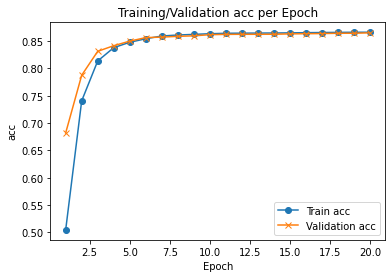

In [16]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + lenet_hist.history['accuracy'], 'o-')
ax.plot([None] + lenet_hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

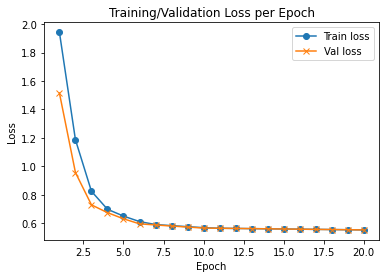

In [18]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + lenet_hist.history['loss'], 'o-')
ax.plot([None] + lenet_hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

Trying it with Adam instead of SGD

In [19]:
lenet_model.compile(loss = 'categorical_crossentropy',
                    optimizer = 'Adam',
                    metrics = ['accuracy'])


In [20]:
lenet_model.fit(X_train, y_train,
                batch_size = 32,
                validation_data = (X_val, y_val),
                callbacks = callbacks,
                epochs = 20,
                verbose = 2, shuffle = True)

Epoch 1/20


1500/1500 - 6s - loss: 0.2051 - accuracy: 0.9394 - val_loss: 0.1032 - val_accuracy: 0.9685 - lr: 5.0000e-04 - 6s/epoch - 4ms/step
Epoch 2/20


1500/1500 - 5s - loss: 0.0859 - accuracy: 0.9735 - val_loss: 0.0706 - val_accuracy: 0.9786 - lr: 5.0000e-04 - 5s/epoch - 3ms/step
Epoch 3/20


1500/1500 - 5s - loss: 0.0599 - accuracy: 0.9812 - val_loss: 0.0542 - val_accuracy: 0.9835 - lr: 5.0000e-04 - 5s/epoch - 3ms/step
Epoch 4/20


1500/1500 - 5s - loss: 0.0359 - accuracy: 0.9896 - val_loss: 0.0455 - val_accuracy: 0.9862 - lr: 2.0000e-04 - 5s/epoch - 3ms/step
Epoch 5/20


1500/1500 - 5s - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.0400 - val_accuracy: 0.9880 - lr: 2.0000e-04 - 5s/epoch - 3ms/step
Epoch 6/20


1500/1500 - 5s - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.0385 - val_accuracy: 0.9886 - lr: 2.0000e-04 - 5s/epoch - 4ms/step
Epoch 7/20


1500/1500 - 5s - loss: 0.0195 - accuracy: 0.9948 - val_loss: 0.0369 - val_accuracy: 0.9888 - lr: 5.0000e-05 - 5s/epoch - 3ms/step
Epoch 8/20


1500/1500 - 5s - loss: 0.0181 - accuracy: 0.9953 - val_loss: 0.0356 - val_accuracy: 0.9893 - lr: 5.0000e-05 - 5s/epoch - 3ms/step
Epoch 9/20


1500/1500 - 5s - loss: 0.0172 - accuracy: 0.9956 - val_loss: 0.0375 - val_accuracy: 0.9885 - lr: 5.0000e-05 - 5s/epoch - 4ms/step
Epoch 10/20


1500/1500 - 5s - loss: 0.0164 - accuracy: 0.9960 - val_loss: 0.0368 - val_accuracy: 0.9893 - lr: 5.0000e-05 - 5s/epoch - 3ms/step
Epoch 11/20


1500/1500 - 5s - loss: 0.0145 - accuracy: 0.9969 - val_loss: 0.0350 - val_accuracy: 0.9894 - lr: 1.0000e-05 - 5s/epoch - 4ms/step
Epoch 12/20


1500/1500 - 6s - loss: 0.0142 - accuracy: 0.9970 - val_loss: 0.0347 - val_accuracy: 0.9894 - lr: 1.0000e-05 - 6s/epoch - 4ms/step
Epoch 13/20


1500/1500 - 5s - loss: 0.0140 - accuracy: 0.9970 - val_loss: 0.0347 - val_accuracy: 0.9893 - lr: 1.0000e-05 - 5s/epoch - 3ms/step
Epoch 14/20


1500/1500 - 5s - loss: 0.0139 - accuracy: 0.9971 - val_loss: 0.0346 - val_accuracy: 0.9893 - lr: 1.0000e-05 - 5s/epoch - 3ms/step
Epoch 15/20


1500/1500 - 5s - loss: 0.0137 - accuracy: 0.9970 - val_loss: 0.0347 - val_accuracy: 0.9893 - lr: 1.0000e-05 - 5s/epoch - 3ms/step
Epoch 16/20


1500/1500 - 5s - loss: 0.0135 - accuracy: 0.9972 - val_loss: 0.0348 - val_accuracy: 0.9896 - lr: 1.0000e-05 - 5s/epoch - 3ms/step
Epoch 17/20


1500/1500 - 5s - loss: 0.0134 - accuracy: 0.9973 - val_loss: 0.0345 - val_accuracy: 0.9897 - lr: 1.0000e-05 - 5s/epoch - 3ms/step
Epoch 18/20


1500/1500 - 5s - loss: 0.0132 - accuracy: 0.9972 - val_loss: 0.0346 - val_accuracy: 0.9896 - lr: 1.0000e-05 - 5s/epoch - 3ms/step
Epoch 19/20


1500/1500 - 5s - loss: 0.0131 - accuracy: 0.9974 - val_loss: 0.0348 - val_accuracy: 0.9896 - lr: 1.0000e-05 - 5s/epoch - 3ms/step
Epoch 20/20


1500/1500 - 5s - loss: 0.0129 - accuracy: 0.9974 - val_loss: 0.0345 - val_accuracy: 0.9896 - lr: 1.0000e-05 - 5s/epoch - 3ms/step


In [26]:
score = lenet_model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy:", round(score[1]*100, 4))

Accuracy: 99.01
